In [251]:
import copy

In [229]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from mlxtend.evaluate import bias_variance_decomp
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [230]:
sample_size = 100
training_size = 60
X = np.random.normal(0, 2, [sample_size, 1])
y = 5*np.squeeze(X)**2 + np.random.normal(0, 2, sample_size)

In [231]:
# training set
x_train = np.reshape(x[:training_size], (-1, 1))
y_train = np.reshape(y[:training_size], (-1, 1))

x_test = np.reshape(x[training_size:], (-1, 1))
y_test = np.reshape(y[training_size:], (-1, 1))

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True)

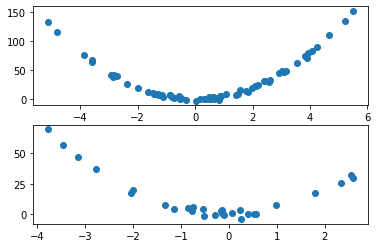

In [233]:
fig, axs = plt.subplots(2)
axs[0].plot(X_train,y_train, 'o')
axs[1].plot(X_test,y_test, 'o')

In [256]:
def get_training_data(x, degree):
    data = []
    for i in range(1, degree+1):
        data.append(x**i)
    return np.concatenate(data, axis = 1)

def train_models(model):
    reg_lin = copy.deepcopy(model)
    linear_regressor = reg_lin.fit(X_train, y_train)
    
    reg_quadra = copy.deepcopy(model)
    quadratic_regressor = reg_quadra.fit(get_training_data(X_train, 2), y_train)
    
    reg_quart = copy.deepcopy(model)
    quartic_regressor = reg_quart.fit(get_training_data(X_train, 4), y_train)
    
    reg_dec = copy.deepcopy(model) 
    decic_regressor = reg_dec.fit(get_training_data(X_train, 10), y_train)
    return linear_regressor, quadratic_regressor, quartic_regressor, decic_regressor

linear_regressor, quadratic_regressor, quartic_regressor, decic_regressor = train_models(Ridge())

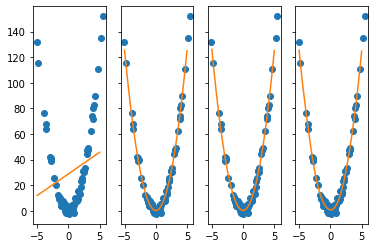

In [257]:
xs = np.reshape(np.linspace(-5,5,100),(-1, 1))
fig, axs = plt.subplots(1,4, sharey=True)
axs[0].plot(X_train, y_train, 'o')
axs[0].plot(xs, linear_regressor.predict(xs))

axs[1].plot(X_train, y_train, 'o')
axs[1].plot(xs, quadratic_regressor.predict(get_training_data(xs, 2)))
            
axs[2].plot(X_train, y_train, 'o')
axs[2].plot(xs, quartic_regressor.predict(get_training_data(xs, 4)))
            
axs[3].plot(X_train, y_train, 'o')
axs[3].plot(xs, decic_regressor.predict(get_training_data(xs, 10)))

In [258]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        linear_regressor, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)

avg_expected_loss_quadratic, avg_bias_quadratic, avg_var_quadratic = bias_variance_decomp(
        quadratic_regressor, get_training_data(X_train,2), y_train, get_training_data(X_test, 2), y_test, 
        loss='mse',
        random_seed=123)

avg_expected_loss_quartic, avg_bias_quartic, avg_var_quartic = bias_variance_decomp(
        quartic_regressor, get_training_data(X_train,4), y_train, get_training_data(X_test, 4), y_test, 
        loss='mse',
        random_seed=123)

avg_expected_loss_decic, avg_bias_decic, avg_var_decic = bias_variance_decomp(
        decic_regressor, get_training_data(X_train,10), y_train, get_training_data(X_test, 10), y_test, 
        loss='mse',
        random_seed=123)

In [259]:
print(f'Linear \n MSE: {avg_expected_loss} , Bias: {avg_bias} , Variance: {avg_var} \n')
print(f'Quadratic \n MSE: {avg_expected_loss_quadratic} , Bias: {avg_bias_quadratic} , Variance: {avg_var_quadratic} \n')
print(f'Quartic \n MSE: {avg_expected_loss_quartic} , Bias: {avg_bias_quartic} , Variance: {avg_var_quartic} \n')
print(f'Decic \n MSE: {avg_expected_loss_decic} , Bias: {avg_bias_decic} , Variance: {avg_var_decic} \n')

Linear 
 MSE: 720.4807493441715 , Bias: 663.0809236378807 , Variance: 57.39982570629071 

Quadratic 
 MSE: 5.551740366371722 , Bias: 5.45639895489995 , Variance: 0.09534141147176638 

Quartic 
 MSE: 5.386214331024087 , Bias: 5.225846073532399 , Variance: 0.16036825749169772 

Decic 
 MSE: 14.373655418771468 , Bias: 5.3108194254915 , Variance: 9.062835993279972 



In [255]:
print(f'Linear \n MSE: {avg_expected_loss} , Bias: {avg_bias} , Variance: {avg_var} \n')
print(f'Quadratic \n MSE: {avg_expected_loss_quadratic} , Bias: {avg_bias_quadratic} , Variance: {avg_var_quadratic} \n')
print(f'Quartic \n MSE: {avg_expected_loss_quartic} , Bias: {avg_bias_quartic} , Variance: {avg_var_quartic} \n')
print(f'Decic \n MSE: {avg_expected_loss_decic} , Bias: {avg_bias_decic} , Variance: {avg_var_decic} \n')

Linear 
 MSE: 1190.415788549189 , Bias: 1133.834166142842 , Variance: 56.581622406347385 

Quadratic 
 MSE: 5.021636497793497 , Bias: 4.847359808795724 , Variance: 0.17427668899774942 

Quartic 
 MSE: 7.958769875841126 , Bias: 6.348889679993858 , Variance: 1.6098801958473032 

Decic 
 MSE: 154893.5531211108 , Bias: 733.629903856844 , Variance: 154159.92321725396 



In [261]:
print(f'Linear \n MSE train: {mse(y_train, linear_regressor.predict(X_train))} , MSE test: {mse(y_test, linear_regressor.predict(X_test))} \n')
print(f'Quadratic \n MSE train: {mse(y_train, quadratic_regressor.predict(get_training_data(X_train, 2)))}, MSE test: {mse(y_test, quadratic_regressor.predict(get_training_data(X_test, 2)))} \n')
print(f'Quartic \n MSE train: {mse(y_train, quartic_regressor.predict(get_training_data(X_train, 4)))}, MSE test: {mse(y_test, quartic_regressor.predict(get_training_data(X_test, 4)))} \n')
print(f'Decic \n MSE train: {mse(y_train, decic_regressor.predict(get_training_data(X_train, 10)))}, MSE test: {mse(y_test, decic_regressor.predict(get_training_data(X_test, 10)))} \n')

Linear 
 MSE train: 1314.7608525347014 , MSE test: 589.5628488226638 

Quadratic 
 MSE train: 3.7068154026811277, MSE test: 5.375802564207167 

Quartic 
 MSE train: 3.7800200576870004, MSE test: 5.569082271154719 

Decic 
 MSE train: 4.821075233981532, MSE test: 6.793365550978714 



In [224]:
print(f'Linear \n MSE train: {mse(y_train, linear_regressor.predict(X_train))} , MSE test: {mse(y_test, linear_regressor.predict(X_test))} \n')
print(f'Quadratic \n MSE train: {mse(y_train, quadratic_regressor.predict(get_training_data(X_train, 2)))}, MSE test: {mse(y_test, quadratic_regressor.predict(get_training_data(X_test, 2)))} \n')
print(f'Quartic \n MSE train: {mse(y_train, quartic_regressor.predict(get_training_data(X_train, 4)))}, MSE test: {mse(y_test, quartic_regressor.predict(get_training_data(X_test, 4)))} \n')
print(f'Decic \n MSE train: {mse(y_train, decic_regressor.predict(get_training_data(X_train, 10)))}, MSE test: {mse(y_test, decic_regressor.predict(get_training_data(X_test, 10)))} \n')

Linear 
 MSE train: 838.1801050905451 , MSE test: 1101.5945297920018 

Quadratic 
 MSE train: 3.033133017729113, MSE test: 5.430172660007355 

Quartic 
 MSE train: 3.011781807269548, MSE test: 5.749001949239498 

Decic 
 MSE train: 13.32981863866877, MSE test: 806.0615062125514 

